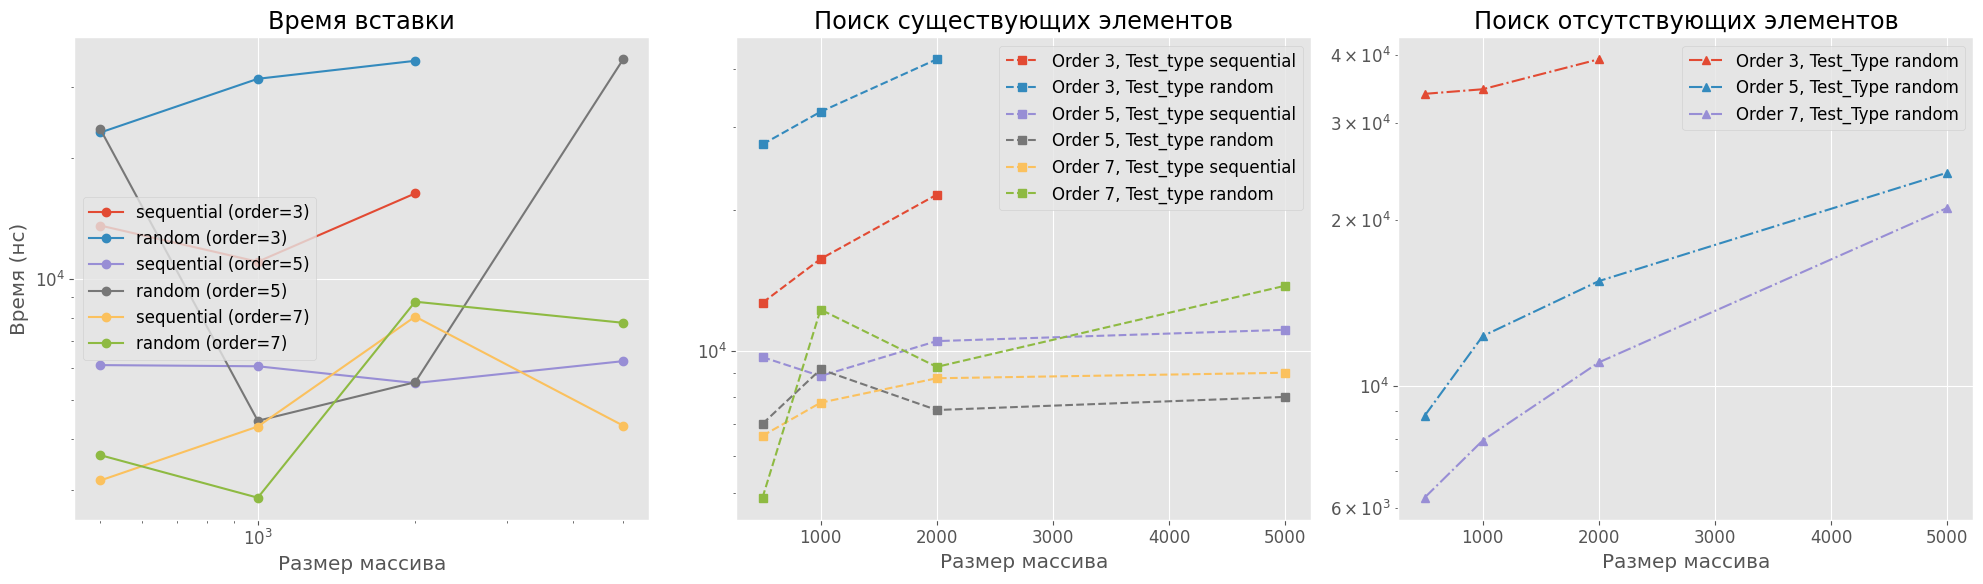

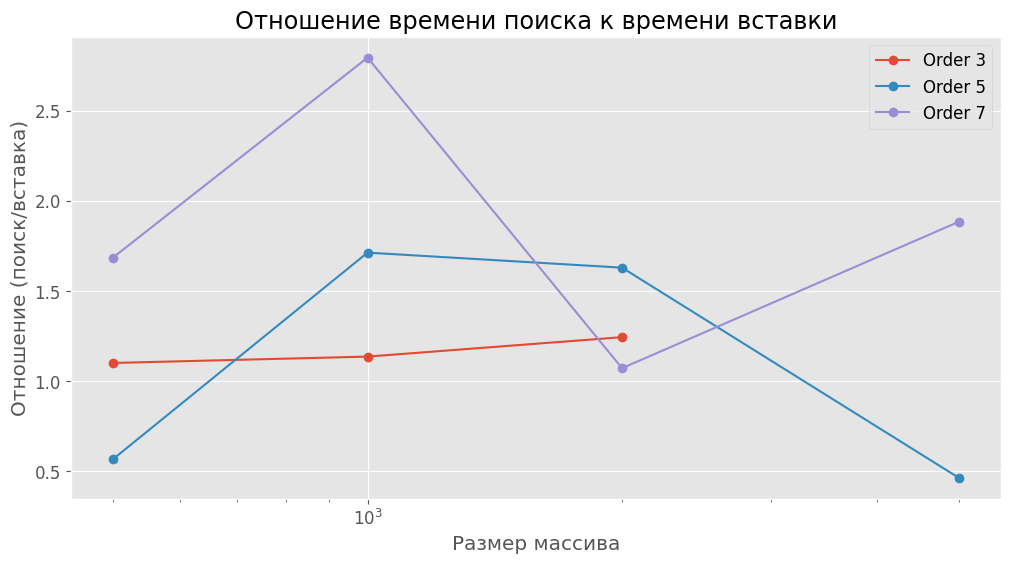


Среднее время операций (нс):
order                    3          5         7
operation                                      
insert        21679.000000  11562.500  5369.375
search_exist  25303.000000   8985.750  9047.625
search_miss   25540.333333  13928.125  9910.625


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

def load_data(filename):
    return pd.read_csv(filename)

def plot_combined_results(df):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # График вставки
    for order in df['order'].unique():
        for test_type in df['test_type'].unique():
            subset = df[(df['order'] == order) & (df['test_type'] == test_type) & (df['operation'] == 'insert')]
            axes[0].plot(subset['array_size'], subset['time_ns'], 
                        marker='o', linestyle='-',
                        label=f'{test_type} (order={order})')
    axes[0].set_title('Время вставки')
    axes[0].set_xlabel('Размер массива')
    axes[0].set_ylabel('Время (нс)')
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].grid(True)
    
    # График поиска существующих
    for order in df['order'].unique():        
        for test_type in df["test_type"].unique():
            subset = (df[(df['test_type'] == test_type) & (df['order'] == order) & (df['operation'] == 'search_exist')])
            axes[1].plot(subset['array_size'], subset['time_ns'], 
            marker='s', linestyle='--',
            label=f'Order {order}, Test_type {test_type}')
    axes[1].set_title('Поиск существующих элементов')
    axes[1].set_xlabel('Размер массива')
    axes[1].set_yscale('log')
    axes[1].grid(True)
    
    # График поиска отсутствующих
    for order in df['order'].unique():        
        for test_type in df["test_type"].unique():
            subset = (df[(df['test_type'] == test_type) & (df['order'] == order) & (df['operation'] == 'search_miss')])
        axes[2].plot(subset['array_size'], subset['time_ns'], 
                    marker='^', linestyle='-.',
                    label=f'Order {order}, Test_Type {test_type}')
    axes[2].set_title('Поиск отсутствующих элементов')
    axes[2].set_xlabel('Размер массива')
    axes[2].set_yscale('log')
    axes[2].grid(True)
    
    for ax in axes:
        ax.legend()
    plt.tight_layout()
    plt.savefig('combined_results.png', dpi=300)
    plt.show()

def plot_performance_ratio(df):
    plt.figure(figsize=(12, 6))
    
    for order in df['order'].unique():
        subset = df[df['order'] == order]
        pivot = subset.pivot_table(index='array_size', columns='operation', values='time_ns')
        pivot['ratio'] = pivot['search_exist'] / pivot['insert']
        plt.plot(pivot.index, pivot['ratio'], 
                marker='o', linestyle='-',
                label=f'Order {order}')
    
    plt.title('Отношение времени поиска к времени вставки')
    plt.xlabel('Размер массива')
    plt.ylabel('Отношение (поиск/вставка)')
    plt.xscale('log')
    plt.grid(True)
    plt.legend()
    plt.savefig('performance_ratio.png', dpi=300)
    plt.show()

if __name__ == "__main__":
    df = load_data("res2.txt")
    plot_combined_results(df)
    plot_performance_ratio(df)
    
    # Дополнительная статистика
    print("\nСреднее время операций (нс):")
    print(df.groupby(['operation', 'order'])['time_ns'].mean().unstack())

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

def load_data(filename):
    return pd.read_csv(filename)

def save_transparent(fig, filename):
    """Сохраняет график с прозрачным фоном"""
    fig.patch.set_alpha(0.0)
    fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, transparent=True, dpi=300)
    plt.close(fig)

def plot_combined_results(df):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # График вставки
    for order in df['order'].unique():
        for test_type in df['test_type'].unique():
            subset = df[(df['order'] == order) & (df['test_type'] == test_type) & (df['operation'] == 'insert')]
            axes[0].plot(subset['array_size'], subset['time_ns'], 
                        marker='o', linestyle='-',
                        label=f'{test_type} (order={order})')
    axes[0].set_title('Время вставки')
    axes[0].set_xlabel('Размер массива')
    axes[0].set_ylabel('Время (нс)')
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].grid(True, alpha=0.3)
    
    # График поиска существующих
    for order in df['order'].unique():        
        for test_type in df["test_type"].unique():
            subset = (df[(df['test_type'] == test_type) & (df['order'] == order) & (df['operation'] == 'search_exist')])
            axes[1].plot(subset['array_size'], subset['time_ns'], 
                        marker='s', linestyle='--',
                        label=f'Order {order}, {test_type}')
    axes[1].set_title('Поиск существующих элементов')
    axes[1].set_xlabel('Размер массива')
    axes[1].set_yscale('log')
    axes[1].grid(True, alpha=0.3)
    
    # График поиска отсутствующих
    for order in df['order'].unique():        
        for test_type in df["test_type"].unique():
            subset = (df[(df['test_type'] == test_type) & (df['order'] == order) & (df['operation'] == 'search_miss')])
            axes[2].plot(subset['array_size'], subset['time_ns'], 
                        marker='^', linestyle='-.',
                        label=f'Order {order}, {test_type}')
    axes[2].set_title('Поиск отсутствующих элементов')
    axes[2].set_xlabel('Размер массива')
    axes[2].set_yscale('log')
    axes[2].grid(True, alpha=0.3)
    
    for ax in axes:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.set_facecolor('none')  # Прозрачный фон области графика
    
    plt.tight_layout()
    save_transparent(fig, 'combined_results.png')

def plot_performance_ratio(df):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    
    for order in df['order'].unique():
        subset = df[df['order'] == order]
        pivot = subset.pivot_table(index='array_size', columns='operation', values='time_ns')
        pivot['ratio'] = pivot['search_exist'] / pivot['insert']
        ax.plot(pivot.index, pivot['ratio'], 
                marker='o', linestyle='-',
                label=f'Order {order}')
    
    ax.set_title('Отношение времени поиска к времени вставки')
    ax.set_xlabel('Размер массива')
    ax.set_ylabel('Отношение (поиск/вставка)')
    ax.set_xscale('log')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_facecolor('none')  # Прозрачный фон области графика
    
    save_transparent(fig, 'performance_ratio.png')

if __name__ == "__main__":
    df = load_data("res2.txt")
    plot_combined_results(df)
    plot_performance_ratio(df)
    
    # Дополнительная статистика
    print("\nСреднее время операций (нс):")
    print(df.groupby(['operation', 'order'])['time_ns'].mean().unstack())


Среднее время операций (нс):
order                    3          5         7
operation                                      
insert        21679.000000  11562.500  5369.375
search_exist  25303.000000   8985.750  9047.625
search_miss   25540.333333  13928.125  9910.625


In [6]:
for order in df['order'].unique():        
        for test_type in df["test_type"].unique():
            print(df[(df['test_type'] == test_type) & (df['order'] == order) & (df['operation'] == 'search_exist')])
            
            

    test_type  order  array_size     operation  time_ns
1  sequential      3         500  search_exist    12693
4  sequential      3        1000  search_exist    15733
7  sequential      3        2000  search_exist    21562
   test_type  order  array_size     operation  time_ns
10    random      3         500  search_exist    27590
13    random      3        1000  search_exist    32369
16    random      3        2000  search_exist    41871
     test_type  order  array_size     operation  time_ns
19  sequential      5         500  search_exist     9723
22  sequential      5        1000  search_exist     8861
25  sequential      5        2000  search_exist    10517
28  sequential      5        5000  search_exist    11116
   test_type  order  array_size     operation  time_ns
31    random      5         500  search_exist     7011
34    random      5        1000  search_exist     9156
37    random      5        2000  search_exist     7502
40    random      5        5000  search_exist     8

Доступные стили: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Данные успешно загружены. Пример данных:
    test_type  order  array_size     operation  time_ns
0  sequential      3         500        insert    13563
1  sequential      3         500  search_exist    12693
2  sequential      3         500   search_miss    12610
3  sequential      3        1000        insert    11034
4  sequential      3        1000  search_exist    15733


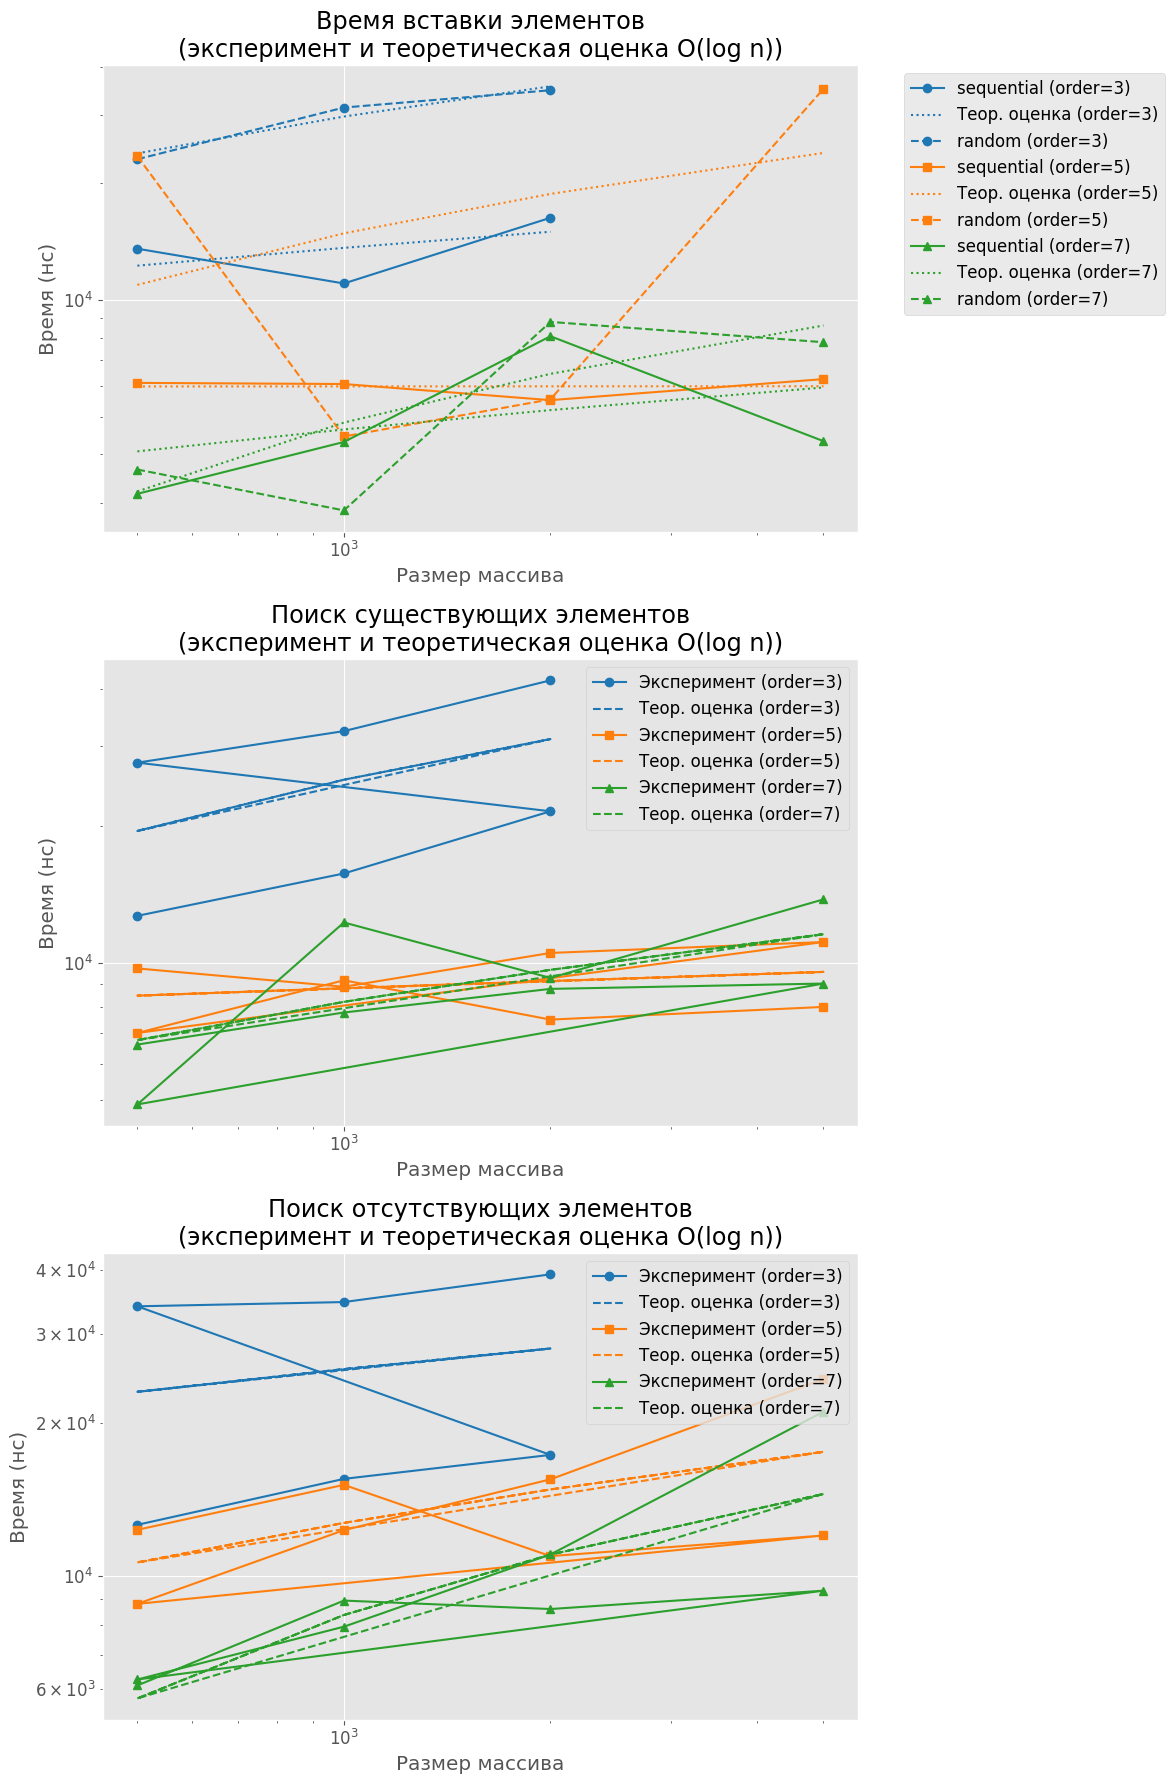

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Проверка доступных стилей и использование альтернативы
available_styles = plt.style.available
print("Доступные стили:", available_styles)
plt.style.use('ggplot' if 'ggplot' in available_styles else 'default')

plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

def load_data(filename):
    """Загрузка данных из файла"""
    try:
        df = pd.read_csv(filename)
        print("Данные успешно загружены. Пример данных:")
        print(df.head())
        return df
    except Exception as e:
        print(f"Ошибка при загрузке файла: {e}")
        return None

def log_func(x, a, b):
    """Логарифмическая функция для аппроксимации"""
    return a * np.log(x) + b

def plot_with_theory(df):
    """Построение графиков с теоретическими оценками"""
    if df is None:
        return
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))
    plt.subplots_adjust(hspace=0.3)
    
    # Цвета и маркеры для разных порядков
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    markers = ['o', 's', '^']
    
    # 1. График времени вставки
    ax = axes[0]
    for i, order in enumerate(sorted(df['order'].unique())):
        for test_type in df['test_type'].unique():
            subset = df[(df['order'] == order) & 
                      (df['test_type'] == test_type) & 
                      (df['operation'] == 'insert')]
            if not subset.empty:
                # Экспериментальные данные
                ax.plot(subset['array_size'], subset['time_ns'],
                       marker=markers[i],
                       linestyle='-' if test_type == 'sequential' else '--',
                       color=colors[i],
                       label=f'{test_type} (order={order})')
                
                # Теоретическая оценка (O(log n))
                xdata = subset['array_size']
                ydata = subset['time_ns']
                try:
                    popt, _ = curve_fit(log_func, xdata, ydata)
                    ax.plot(xdata, log_func(xdata, *popt), ':', 
                           color=colors[i],
                           label=f'Теор. оценка (order={order})' if test_type == 'sequential' else "")
                except:
                    continue
    
    ax.set_title('Время вставки элементов\n(эксперимент и теоретическая оценка O(log n))')
    ax.set_xlabel('Размер массива')
    ax.set_ylabel('Время (нс)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)

    # 2. График поиска существующих элементов
    ax = axes[1]
    for i, order in enumerate(sorted(df['order'].unique())):
        subset = df[(df['order'] == order) & 
                   (df['operation'] == 'search_exist')]
        if not subset.empty:
            # Экспериментальные данные
            xdata = subset['array_size']
            ydata = subset['time_ns']
            ax.plot(xdata, ydata,
                   marker=markers[i],
                   linestyle='-',
                   color=colors[i],
                   label=f'Эксперимент (order={order})')
            
            # Теоретическая оценка (O(log n))
            try:
                popt, _ = curve_fit(log_func, xdata, ydata)
                ax.plot(xdata, log_func(xdata, *popt), '--',
                       color=colors[i],
                       label=f'Теор. оценка (order={order})')
            except:
                continue
    
    ax.set_title('Поиск существующих элементов\n(эксперимент и теоретическая оценка O(log n))')
    ax.set_xlabel('Размер массива')
    ax.set_ylabel('Время (нс)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()
    ax.grid(True)

    # 3. График поиска отсутствующих элементов
    ax = axes[2]
    for i, order in enumerate(sorted(df['order'].unique())):
        subset = df[(df['order'] == order) & 
                   (df['operation'] == 'search_miss')]
        if not subset.empty:
            # Экспериментальные данные
            xdata = subset['array_size']
            ydata = subset['time_ns']
            ax.plot(xdata, ydata,
                   marker=markers[i],
                   linestyle='-',
                   color=colors[i],
                   label=f'Эксперимент (order={order})')
            
            # Теоретическая оценка (O(log n))
            try:
                popt, _ = curve_fit(log_func, xdata, ydata)
                ax.plot(xdata, log_func(xdata, *popt), '--',
                       color=colors[i],
                       label=f'Теор. оценка (order={order})')
            except:
                continue
    
    ax.set_title('Поиск отсутствующих элементов\n(эксперимент и теоретическая оценка O(log n))')
    ax.set_xlabel('Размер массива')
    ax.set_ylabel('Время (нс)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.savefig('b_tree_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    # Укажите правильный путь к файлу с данными
    data_file = "res2.txt"  # Или полный путь "C:/path/to/your/res.txt"
    df = load_data(data_file)
    if df is not None:
        plot_with_theory(df)